# Simulation of Neural Spike Trains through Poisson Processes

<hr>

### Overview

This notebook is based on the post [1]. Here we'll simulate neural spike trains based solely on the firing rate of a neuron. The spikes (or action potentials) are represented as black bars of a raster plot.

Features of the raster plot:
- Black bars: spikes (action potentials);
- Rows (spike trains): spiking activity of a neuron.

The simulation is based on the following explanation by Dayan and Abbott [2]:

> <i>Spike sequences can be simulated by using some estimate of the firing rate, fr, predicted from knowledge of the stimulus, to drive a Poisson process. A simple procedure for generating spikes in a computer program is based on the fact that the estimated probability of firing a spike during a short interval of duration dt is fr*dt. The program progresses through time in small steps of size dt and generates, at each time step, a random number x chosen uniformly in the range between 0 and 1. If x < fr*dt at that time step, a spike is fired; otherwise it is not.</i>


### References

[1] Namburi, P. (2015). Simulating neural spike trains. (https://praneethnamburi.com/2015/02/05/simulating-neural-spike-trains)<br>
[2] Dayan, P., & Abbott, L. F. (2005). Theoretical Neuroscience: Computational and Mathematical Modeling of Neural Systems. MIT press.


<hr>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Poisson Process

In [33]:
def events(M):
    E = []
    num_rows, num_cols = M.shape
    for i in range(num_rows):
        events = []
        for j in range(num_cols):
            if M[i,j] != 0:
                events.append(M[i,j])
            else:
                pass
        E.append(events)
    return E

In [34]:
def poissonSpikeGen(fr, tSim, nTrials):
    '''Returns an array of arrays with the firing time of each neuron.
    Parameters
    ---------
    fr: (float) firing rate in Hz.
    tSim: (float) simulation time in seconds. 
    nTrials: (integer) number of simulations.
    '''
    dt = 1/1000
    nBins = round(tSim/dt)
    spikeMat = np.random.random([nTrials, nBins]) < fr*dt #spike matrix
    
    num_rows, num_cols = spikeMat.shape
    spikeMat_ft = np.zeros((num_rows, num_cols))
    
    tVec = np.arange(0, tSim-dt, dt) #time vector
    
    for i in range(num_rows):
        for j in range(num_cols):
            if spikeMat[i,j] == True:
                spikeMat_ft[i,j] = tVec[j-1]
            else:
                spikeMat_ft[i,j] = 0
    
    return events(spikeMat_ft)

In [35]:
def plotRaster(spikeMat):
    '''Plots the raster plot.
    Parameters
    ---------
    spikeMat: (array) array of arrays with the firing time of each neuron.
    '''
    #Spike raster plot
    plt.figure(3,figsize=(8,4)) 
    plt.eventplot(spikeMat, color='black', linelengths=0.7)   
    plt.title('Spike raster plot')
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron')
    plt.show()

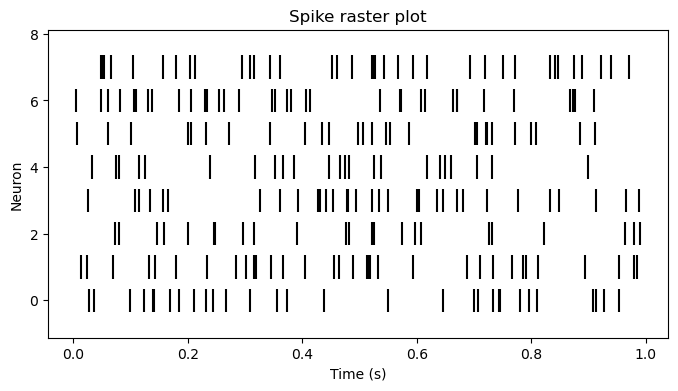

In [40]:
spikeMat = poissonSpikeGen(30, 1, 8)
plotRaster(spikeMat)

## Random process

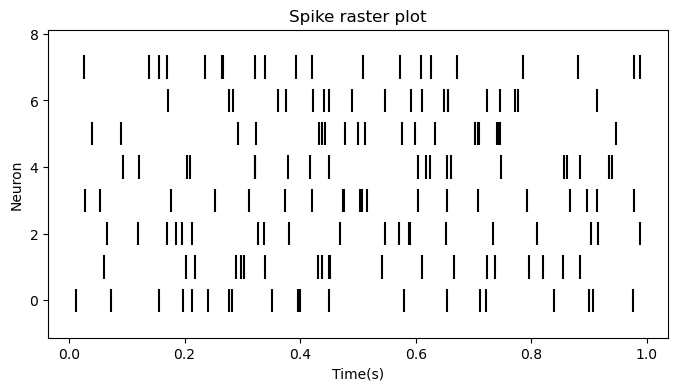

In [37]:
#Random data to simulate spike trains
randomSpikes = np.random.random([8, 20])

#Spike raster plot
plt.figure(3,figsize=(8,4)) 
plt.eventplot(randomSpikes, color='black', linelengths = 0.7)     
plt.title('Spike raster plot')
plt.xlabel('Time(s)')
plt.ylabel('Neuron')
plt.show()